In [36]:
import pytesseract
from PIL import Image

In [73]:
def display(image_file):
    """
    This function is used to  display images in their actual size in the notebook
    """
    import matplotlib.pyplot as plt
    dpi = 80.                               #Dots per Inch
    img = plt.imread(image_file)            #Reads the image from the given path
    height, width = img.shape[:2]           #Get the image dimension
    figsize = height/dpi, width/dpi         #Calculate figure size
    plt.figure(figsize=figsize)             #Create a figure
    plt.axis('off')                         #Hide axes
    plt.imshow(img, cmap='gray')            #Display the image
    plt.show()                              #Renders the figure and displays the image inline

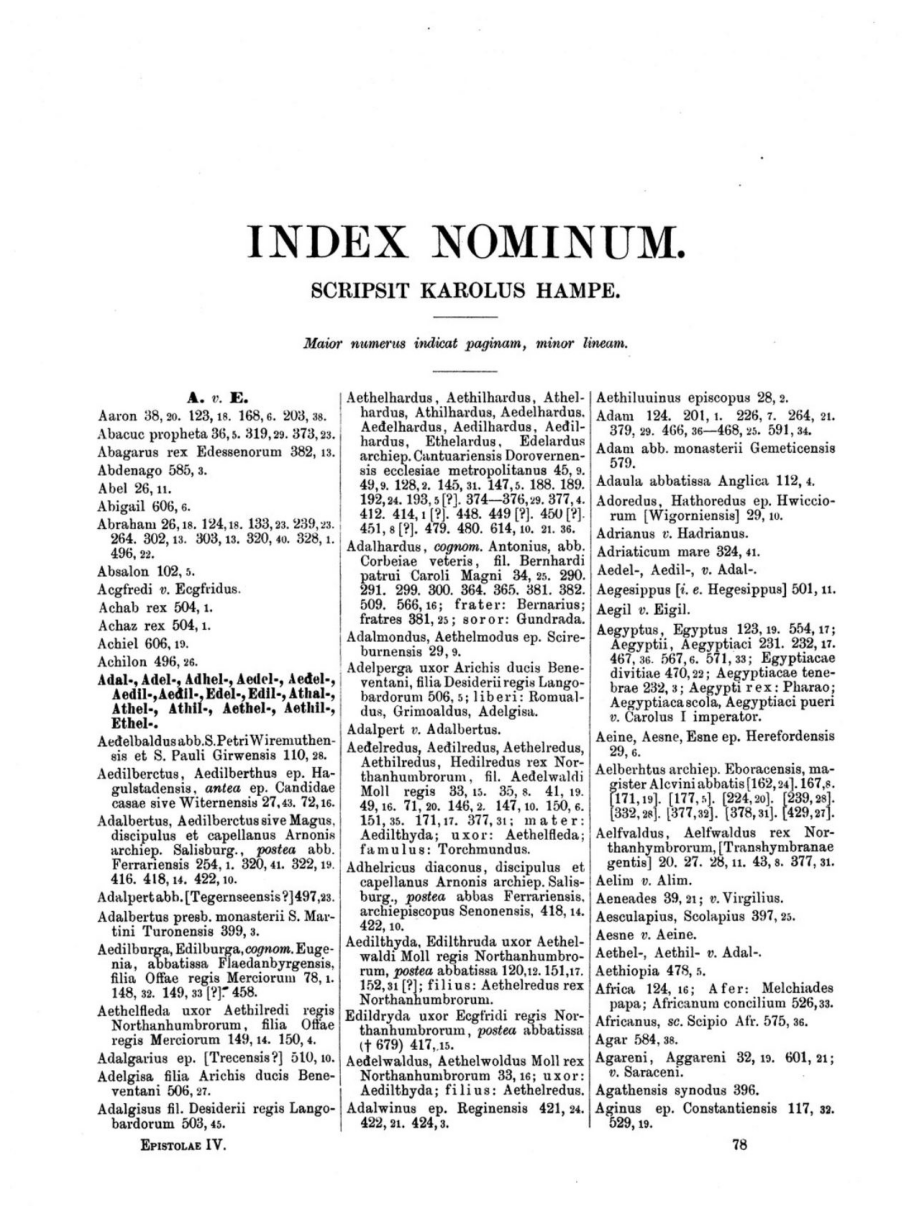

In [75]:
image_file = 'temp/index_02.jpg'
display(image_file)

In [76]:
img = Image.open(image_file)
ocr_result = pytesseract.image_to_string(img)
print(ocr_result)

INDEX NOMINUM.

SCRIPSIT KAROLUS HAMPE.

Maior numerus indicat paginam, minor lineam.

A.v. E.

Aaron 38, 20. 123, 18. 168, 6. 203, 38. |

Abacue propheta 36, 5. 319,29. 373, 23.
Abagarus rex Edessenorum 382, 13.
Abdenago 585, 3.

Abel 26, 11.

Abigail 606, 6.

Abraham 26,18. 124,18. 133, 23, 2:
264. 302, 13. 303, 13. 320, 40. 328, 1.
496, 22.

Absalon 102, 5.

Acgfredi v. Ecgfridus.

Achab rex 504, 1.

Achaz rex 504,1.

Achiel 606, 19.

Achilon 496, 26.

Adal-, Adel-, Adhel-, Aedel-, Aedel-,
‘Aedil-, Aed
Athel-, Athil-, Aethel-, Aethil-
Ethel-.

Aedelbaldusabb.S. Petri Wiremuthen-
sis et S. Pauli Girwensis 110, 28.

Aedilberctus, Aedilberthus ep. Ha-
gulstadensis, antea ep. Candidae
casae sive Witernensis 27,43. 72,16.

Adalbertus, Aedilberctus sive Magus,
discipulus et capellanus Arnonis
archiep. Salisburg., postea_abb.
Ferrariensis 254, 1. 320, 41. 322, 19.
416. 418, 14. 422, 10.

Adalpertabb. [Tegernseensis ?]497,2.

Adalbertus presb. monasterii 8. Mar-
tini Turonensis 399, 3.

Aed

#### We will preprocess the image, to identify colomns, then OCR each colomn individually for better results

In [39]:
import cv2

In [40]:
image = cv2.imread('temp/index_02.jpg')

In [41]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

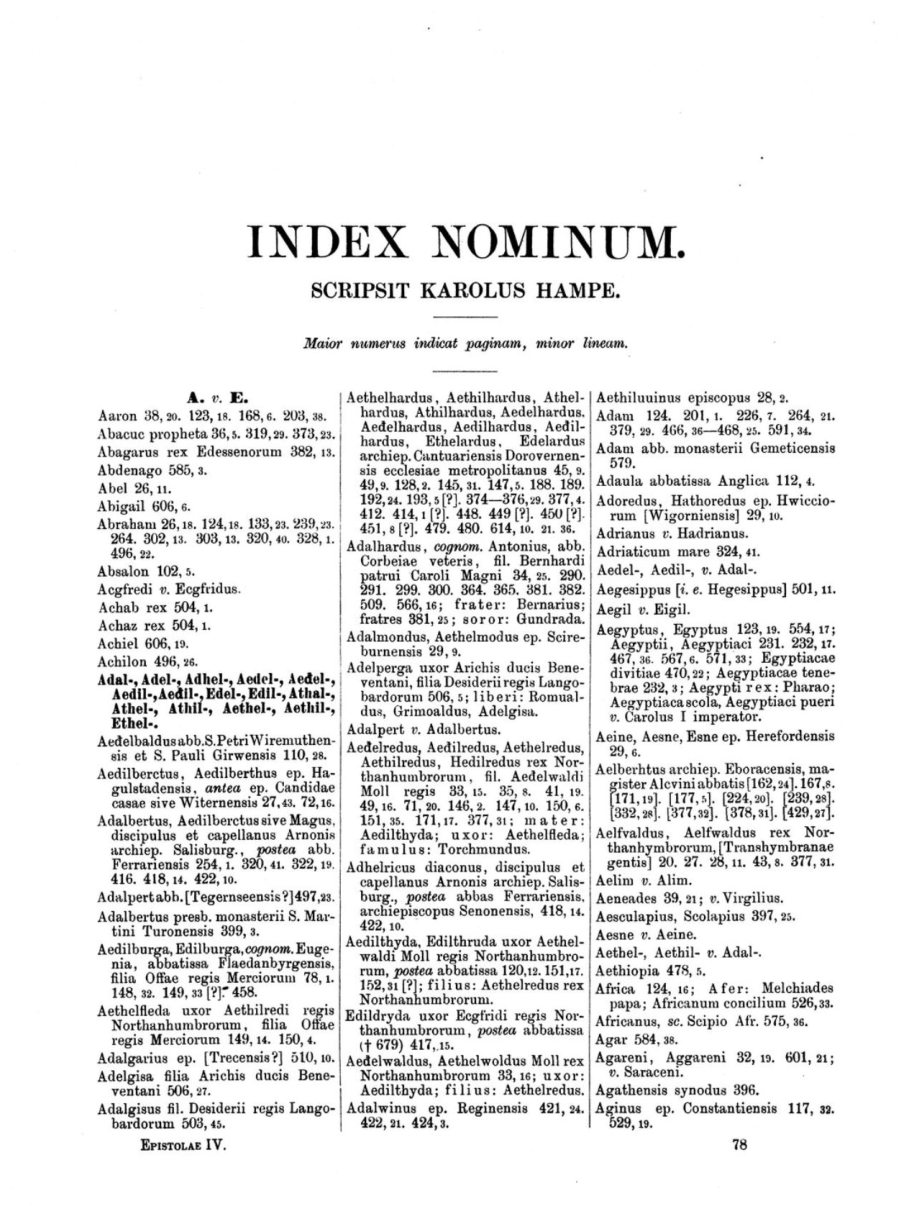

In [77]:
cv2.imwrite('temp/index_gray.jpg', gray)
display('temp/index_gray.jpg')

In [43]:
blur = cv2.GaussianBlur(gray, (7,7), 0)

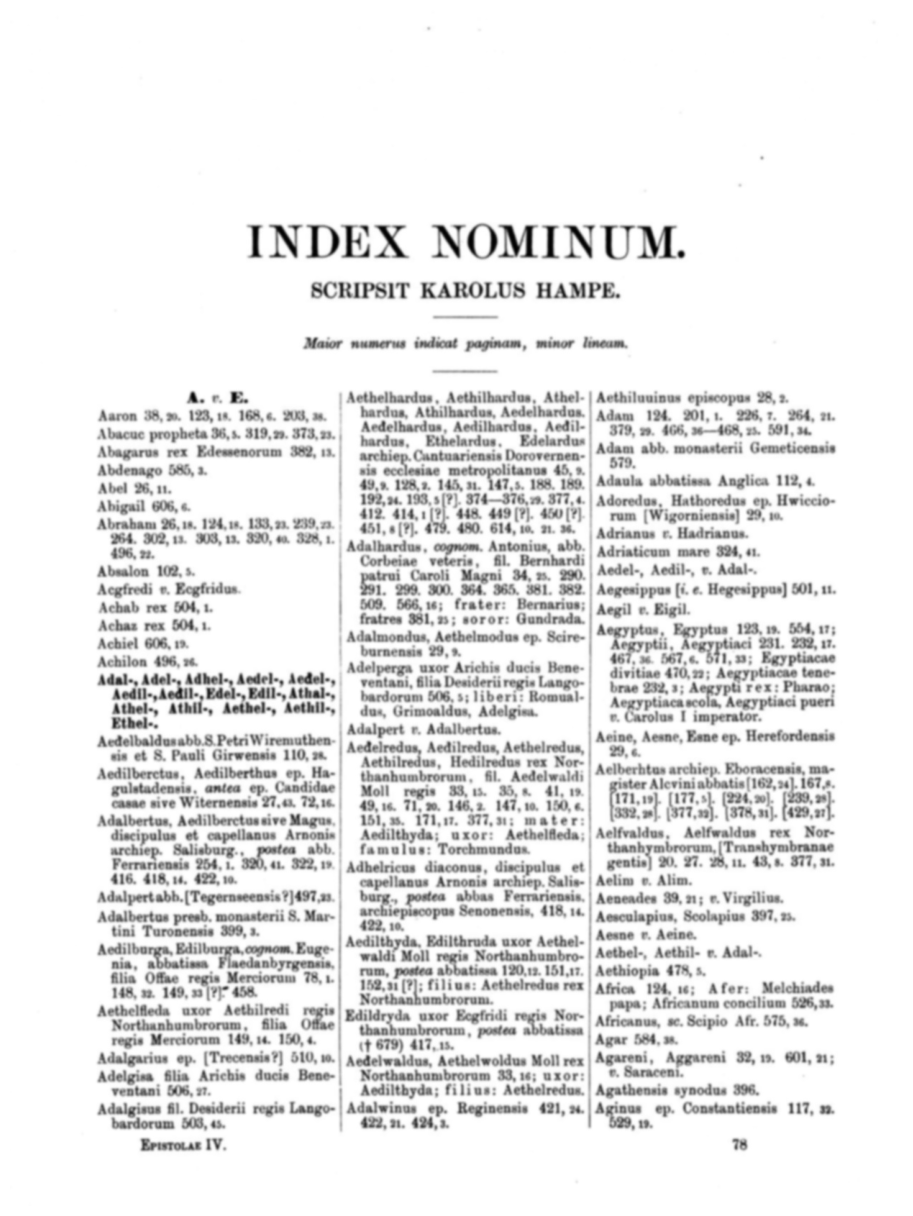

In [78]:
cv2.imwrite('temp/index_blur.jpg', blur)
display('temp/index_blur.jpg')

In [45]:
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

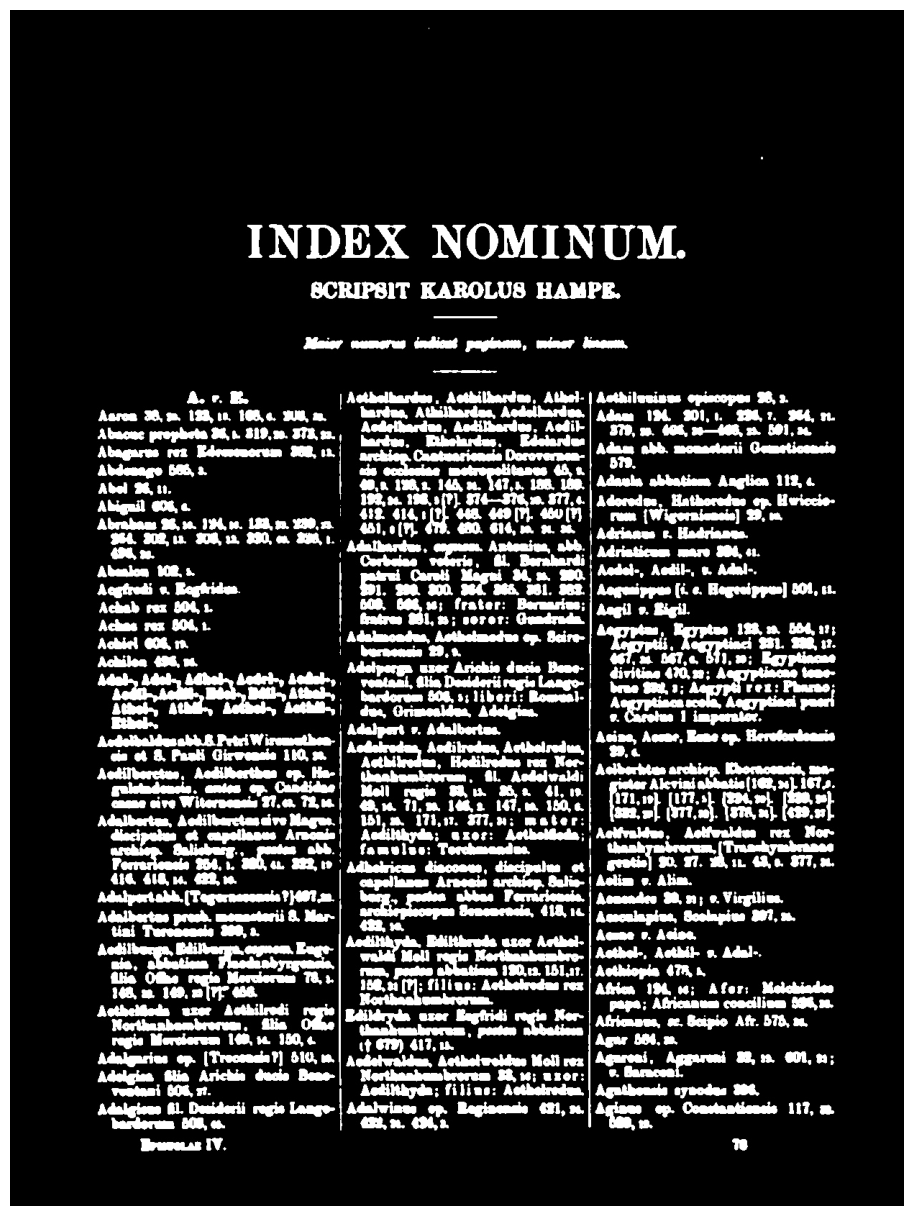

In [79]:
cv2.imwrite('temp/index_thresh.jpg', thresh)
display('temp/index_thresh.jpg')

In [47]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,13))

In [48]:
cv2.imwrite('temp/index_kernel.jpg', kernel)

True

In [49]:
dilate = cv2.dilate(thresh, kernel, iterations=1)

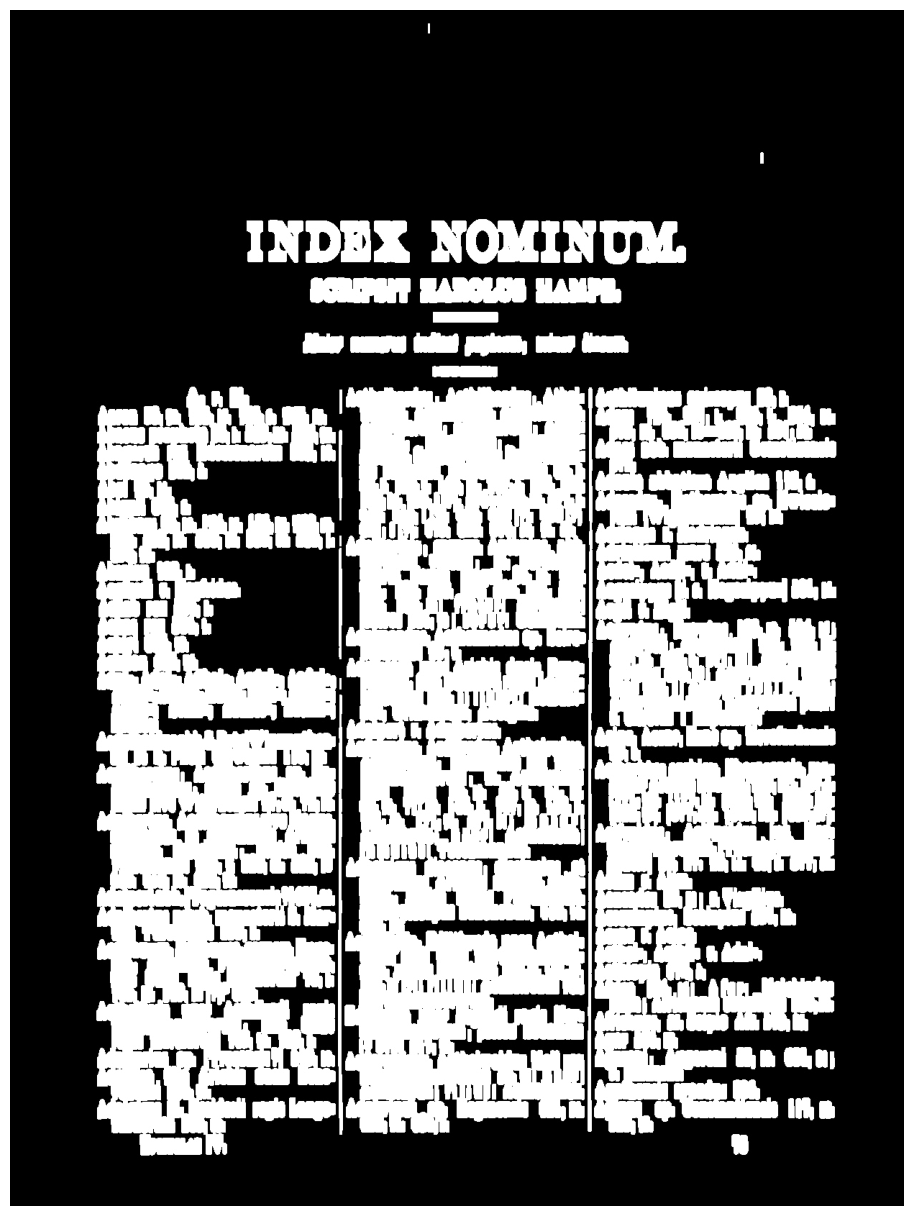

In [81]:
cv2.imwrite('temp/index_dilate.jpg', dilate)
display('temp/index_dilate.jpg')

In [51]:
cnts =cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [52]:
cnts = cnts[0] if len(cnts)==2 else cnts[1]

In [53]:
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

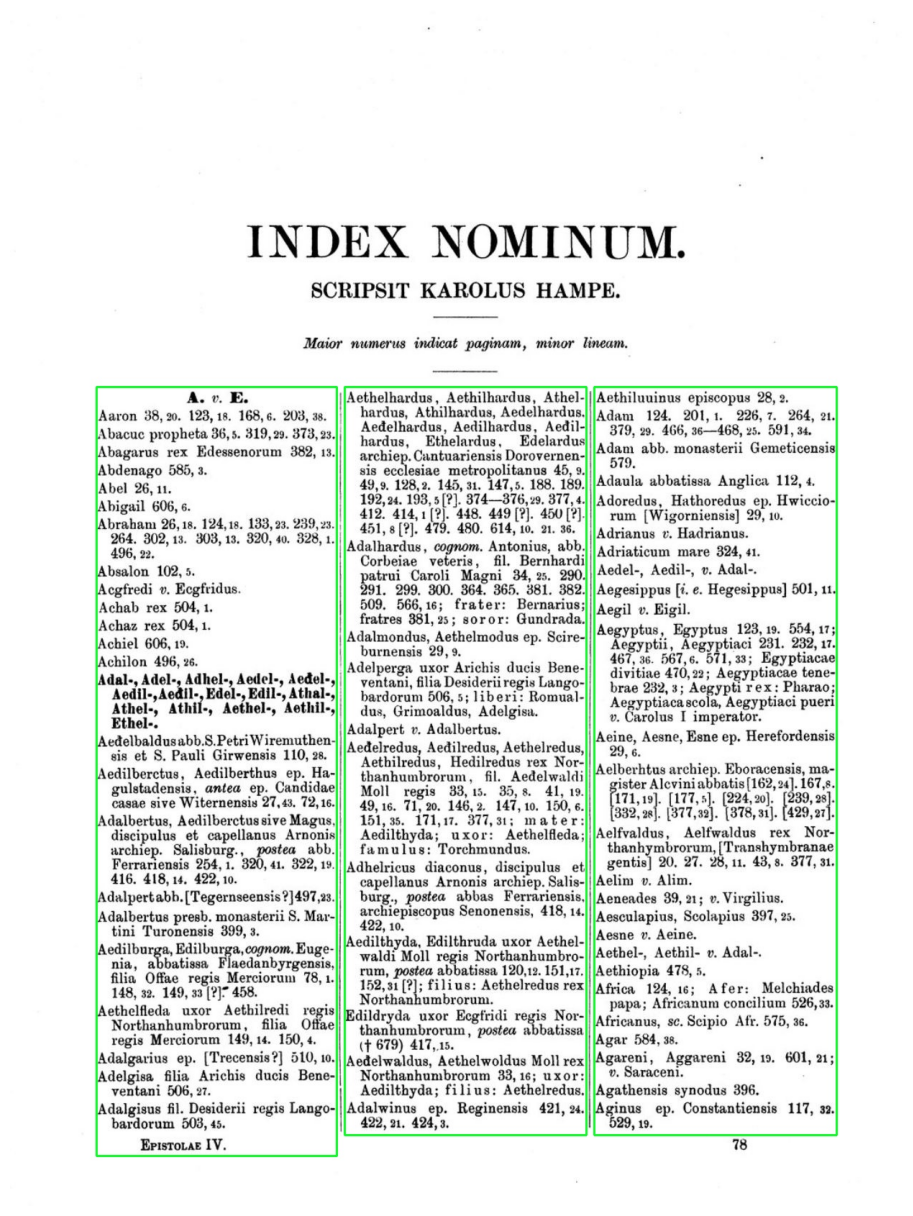

In [82]:
results = []
count = 1
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 200 and w >20:
        roi = image[y:y+h, x:x+w]
        cv2.imwrite(f'temp/index_roi_{count}.jpg', roi)
        cv2.rectangle(image, (x,y), (x+w, y+h), (36,255,12), 2)
        ocr_result =pytesseract.image_to_string(roi)
        ocr_result = ocr_result.split('\n')
        for item in ocr_result:
            results.append(item)         
        count+=1
    
cv2.imwrite('temp/index_box.jpg', image)
display('temp/index_box.jpg')

In [62]:
print(results)

['A. v. E.', '', 'Aaron 38, 20. 123, 18. 168, 6. 203, 38.', 'Abacuc propheta 36,5. 319,29. 373, 23.', 'Abagarus rex Edessenorum 382, 13.', 'Abdenago 585, 3.', 'Abel 26, 11.', 'Abigail 606, 6.', 'Abraham 26,18, 124,18. 133, 23.', '264. 302, 13. 303, 13. 320, 40.', '496, 22.', 'Absalon 102, 5.', 'Acgfredi v. Ecgtridus.', 'Achab rex 504, 1.', 'Achaz rex 504, 1.', 'Achiel 606, 19.', 'Achilon 496, 26.', 'Adal-, Adel-, Adhel-, Aedel-, Aed', '', 'Aedil-, Aedil- Edel-, Edil-, Athal-,', 'Athel-, Athil-, Aethel-, Aethil-,', 'Ethel-.', 'Aedelbaldusabb.S. Petri Wiremuthen-', 'sis et S. Pauli Girwensis 110, 28.', 'Aedilberctus, Aedilberthus ep. Ha-', 'gulstadensis, antea ep. Candidae', 'casae sive Witernensis 27,43. 72,16.', 'Adalbertus, Aedilberctus sive Magus,', 'discipulus et capellanus Arnonis', 'archiep. Salisburg., postea_abb.', 'Ferrariensis 254, 1. 320, 41. 322, 19.', '416. 418, 14. 422, 10.', 'Adalpertabb.[Tegernseensis ?]497,23.', 'Adalbertus presb. monasterii S. Mar-', 'tini Turonensis 3

In [68]:
entities = []
for item in results:
    item = item.strip().replace('\n', "")
    item = item.split(' ')[0]
    if len(item)>2:
        if item[0].isupper() and '-' not in item:
            item = item.split('.')[0].replace(',', '').replace(';', '')
            print(item)
            entities.append(item)

Aaron
Abacuc
Abagarus
Abdenago
Abel
Abigail
Abraham
Absalon
Acgfredi
Achab
Achaz
Achiel
Achilon
Aedelbaldusabb
Aedilberctus
Adalbertus
Ferrariensis
Adalpertabb
Adalbertus
Aedilburga
Aethelfleda
Northanhumbrorum
Adalgarius
Adelgisa
Adalgisus
Epistozae
Aethelhardus
Aedelhardus
Adalhardus
Corbeiae
Adalmondus
Adelperga
Adalpert
Aedelredus
Aethilredus
Moll
Aedilthyda
Adhelricus
Aedilthyda
Northanhumbrorum
Edildryda
Aedelwaldus
Northanhumbrorum
Aedilthyda
Adalwinus
Aethiluuinus
Adam
Adam
Adaula
Adoredus
Adrianus
Adriaticum
Aegesippus
Aegil
Aegyptus
Aegyptii
Aegyptiacascola
Aeine
Aelberhtus
Aelfvaldus
Aelim
Aeneades
Aesculapius
Aesne
Aethiopia
Africa
Africanus
Agar
Agareni
Agathensis
Aginus


In [69]:
entities

['Aaron',
 'Abacuc',
 'Abagarus',
 'Abdenago',
 'Abel',
 'Abigail',
 'Abraham',
 'Absalon',
 'Acgfredi',
 'Achab',
 'Achaz',
 'Achiel',
 'Achilon',
 'Aedelbaldusabb',
 'Aedilberctus',
 'Adalbertus',
 'Ferrariensis',
 'Adalpertabb',
 'Adalbertus',
 'Aedilburga',
 'Aethelfleda',
 'Northanhumbrorum',
 'Adalgarius',
 'Adelgisa',
 'Adalgisus',
 'Epistozae',
 'Aethelhardus',
 'Aedelhardus',
 'Adalhardus',
 'Corbeiae',
 'Adalmondus',
 'Adelperga',
 'Adalpert',
 'Aedelredus',
 'Aethilredus',
 'Moll',
 'Aedilthyda',
 'Adhelricus',
 'Aedilthyda',
 'Northanhumbrorum',
 'Edildryda',
 'Aedelwaldus',
 'Northanhumbrorum',
 'Aedilthyda',
 'Adalwinus',
 'Aethiluuinus',
 'Adam',
 'Adam',
 'Adaula',
 'Adoredus',
 'Adrianus',
 'Adriaticum',
 'Aegesippus',
 'Aegil',
 'Aegyptus',
 'Aegyptii',
 'Aegyptiacascola',
 'Aeine',
 'Aelberhtus',
 'Aelfvaldus',
 'Aelim',
 'Aeneades',
 'Aesculapius',
 'Aesne',
 'Aethiopia',
 'Africa',
 'Africanus',
 'Agar',
 'Agareni',
 'Agathensis',
 'Aginus']

In [70]:
entities = list(set(entities))

In [72]:
entities.sort()
entities

['Aaron',
 'Abacuc',
 'Abagarus',
 'Abdenago',
 'Abel',
 'Abigail',
 'Abraham',
 'Absalon',
 'Acgfredi',
 'Achab',
 'Achaz',
 'Achiel',
 'Achilon',
 'Adalbertus',
 'Adalgarius',
 'Adalgisus',
 'Adalhardus',
 'Adalmondus',
 'Adalpert',
 'Adalpertabb',
 'Adalwinus',
 'Adam',
 'Adaula',
 'Adelgisa',
 'Adelperga',
 'Adhelricus',
 'Adoredus',
 'Adrianus',
 'Adriaticum',
 'Aedelbaldusabb',
 'Aedelhardus',
 'Aedelredus',
 'Aedelwaldus',
 'Aedilberctus',
 'Aedilburga',
 'Aedilthyda',
 'Aegesippus',
 'Aegil',
 'Aegyptiacascola',
 'Aegyptii',
 'Aegyptus',
 'Aeine',
 'Aelberhtus',
 'Aelfvaldus',
 'Aelim',
 'Aeneades',
 'Aesculapius',
 'Aesne',
 'Aethelfleda',
 'Aethelhardus',
 'Aethilredus',
 'Aethiluuinus',
 'Aethiopia',
 'Africa',
 'Africanus',
 'Agar',
 'Agareni',
 'Agathensis',
 'Aginus',
 'Corbeiae',
 'Edildryda',
 'Epistozae',
 'Ferrariensis',
 'Moll',
 'Northanhumbrorum']